# Udacity nano degree - Data Science Project
### Created by Albert Yao  

### Structure

* **Goal of the project**
* **Data Prepocessing**
* **Exploratory Data Analysis**   
>            1.Assumptions & Approach
             2.Insights & Findings 
* **Business Questions** 
>            1.Assumptions & Approach
             2.Insights & Findings 
* **Model/Deploy** 
>            1.Assumptions & Approach 
             2.Insights & Findings 


## Goal of the Project
#### From the course,  try to apply CRISP-DM process when anazlying the data. It could be broken down:
    a. Business Understanding (come up with questions of your own and answer it from the data)
    b. Data Understanding
    c. Prepare data 
    d. Model data
    e. Results
    f. Deploy
   
_1)_ I first set our goal as ** making a profit on investing selected loans**.

_2)_ Further break down ** making a profit on investing selected loans**: 

> - Invest in loans **with lower risk to default**.
- Target **high return rate & profit size** loans. 

_3)_ Focus on exploring variables that:

> - Potentially could have a huge impact on loss (default) rate.
- Potentially could split loan into reasonable groups.   

_4)_ Define general metrics that:

> - Could evaluate **profit rate & size** across different types of loans.  
- Could evaluate **loss rate**. 



### Data Preprocessing
_1)_ Explore different variables, understand their distribution and values.

_2)_ Drop columns that have too many missing(nan, +-inf) values.
> - Create metric to evaluate the frequency of missing values. 
- Choose a reasoable number to make the cut in order to drop the columns.

_3)_ Target loans that are not "current" for our analysis.  
> - Exclue rows that col(loan_status) = 'Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Issued'.

_3)_ Define good and bad loan: 

> - Good : col(loan_status) = 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'.
- Bad : col(loan_status) = 'Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default'.



### Data Preprocessing Part I
- Understand the nature of the data by checking all the columns 
- Explore col(loan_status)

In [480]:
import pkg_resources
import types
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings    
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline




def get_imports():
    
    """Check the version of the required packages. 
    
    Returns:
    name: the packages and version being used in this project
    
    """
    
    
    
    
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name

def load_data():
    
    df = pd.read_csv('loan.csv', low_memory=False)

    return df


def main():

##############################
#get imported packages version 
##############################    
    imports = list(set(get_imports()))
    # The only way I found to get the version of the root package
    # from only the name of the package is to cross-check the names 
    # of installed packages vs. imported packages
    requirements = []
    for m in pkg_resources.working_set:
        if m.project_name in imports and m.project_name!="pip":
            requirements.append((m.project_name, m.version))

    for r in requirements:
        print("{}=={}".format(*r))
    
##############################
#load data 
##############################   
    
    df = load_data()
    df.head()
    
    
main()

seaborn==0.10.0
scikit-learn==0.22.1
pandas==1.0.1
numpy==1.18.1
matplotlib==3.1.3


In [482]:
df = load_data()
df.head()
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [483]:
df["loan_status"].value_counts()



Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [484]:
#print(df.loc[:,'id'])
#print(df.loc[0,:])
print(df.iloc[1:5,0])


1    1077430
2    1077175
3    1076863
4    1075358
Name: id, dtype: int64


 

**Note** : **Charge off** 

  > The credit grantor wrote your account off of their receivables as a loss, and it is closed to future charges. When an account displays a status of "charge off," it means the account is closed to future use, although the debt is still owed.
  
  > The credit grantor may continue to report the past due amount and the balance owed. If you pay the account, the status will reflect as a "paid charge-off."

### Data Prepocessing Part II

- Check missing value 
- Drop columns with missing value > 0.5 
- Classify loans into good&bad loan based on col(loan_status)
- Select loans that are its status are not "current"

In [485]:
percent

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.055746
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000015
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000500
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000110
earliest_cr_line         

In [486]:
def missing_value_column_check(data, percent_cut):
    
        
    """Preprocess data to calculate missing value and set the threshold to identify those columns above the cut(%). 
    
    Args:
    data: pandas dataframe
    percent_cut: threshold to make the cut
    
    Returns:
    missing_value: the columns that have missing value % higher than the threshold we set. 
    
    """
    
    # check each column and select thouse columns that have higher missing_value percentage
    percent = data.isnull().sum()/len(data)
    missing_value = pd.concat([data.isnull().sum(), percent], axis=1)
    missing_value = missing_value.rename(columns = {0 : 'Total', 1 : 'Percent'})
    missing_value = missing_value[
            missing_value.iloc[:,1] != 0].sort_values('Percent', ascending=False).round(2)
    missing_value = missing_value.loc[missing_value['Percent'] > percent_cut]
    
    
    return missing_value


def drop_column_missing_value(missing_value, original_df):
    
            
    """drop those missing_value columns from original dataframe. """
    
    drop_columns = []
    for item in missing_value.index:
        drop_columns.append(item)
    original_df = original_df.drop(drop_columns, axis=1)
    dt_series = pd.to_datetime(df['issue_d'])
    original_df['year'] = dt_series.dt.year
    
    return original_df
    

    


In [487]:
    
missing_df = missing_value(df, 0.1)
dropped_missing_value_df = drop_column_missing_value( missing_df, df)
dropped_missing_value_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011


### Excludate all the current loans and apply rules to decdie good/bad loan 

In [488]:


def loan_condition(status, bad_loan= ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off"],
                   good_loan = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']):
    if status in bad_loan:
        return 'Bad Loan'
    elif status in good_loan:
        return 'Good Loan'
    else:
        return 'current'


    

In [489]:


# exclued all the current loans!! 

filtered_current_dropped_missing_value_df = dropped_missing_value_df[(dropped_missing_value_df['loan_status']!='Current')&(dropped_missing_value_df['loan_status']!='Late (31-120 days)')&
      (dropped_missing_value_df['loan_status']!='Late (16-30 days)')&(dropped_missing_value_df['loan_status']!='In Grace Period')
     &(dropped_missing_value_df['loan_status']!='Default')]


# apply loan condition 
filtered_current_dropped_missing_value_df ['loan_condition'] = filtered_current_dropped_missing_value_df ['loan_status'].apply(loan_condition)

filtered_current_dropped_missing_value_df .head()

/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,year,loan_condition
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011,Good Loan
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011,Bad Loan
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011,Good Loan
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011,Good Loan
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011,Good Loan


### Exploratory Data Analysis
_1)_ Explore col(emp_length)'s relationship with good & bad loans.
> - Focus on "emp_length". Check whether it could be used to further classify loans into groups.

_2)_ Define metrics when evaluating loan profit:
> - **Annualized Profit Rate**,   **Annualized Profit Size**,   **Loss Rate (not annulazied)**.
- Check the definition of the above metrics from Q2. 



_2)_ Explore col(loan_purpose)'s relationship with good & bad loan.  
> - Further classify loans into groups based on summary statistics and charts. 
- LossRate X Purpose bar chart 
- LossRate X Purpose scatter plot
- LossRate X Profit scatter plot





#### employment history 


#### plot employment history graph 

/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


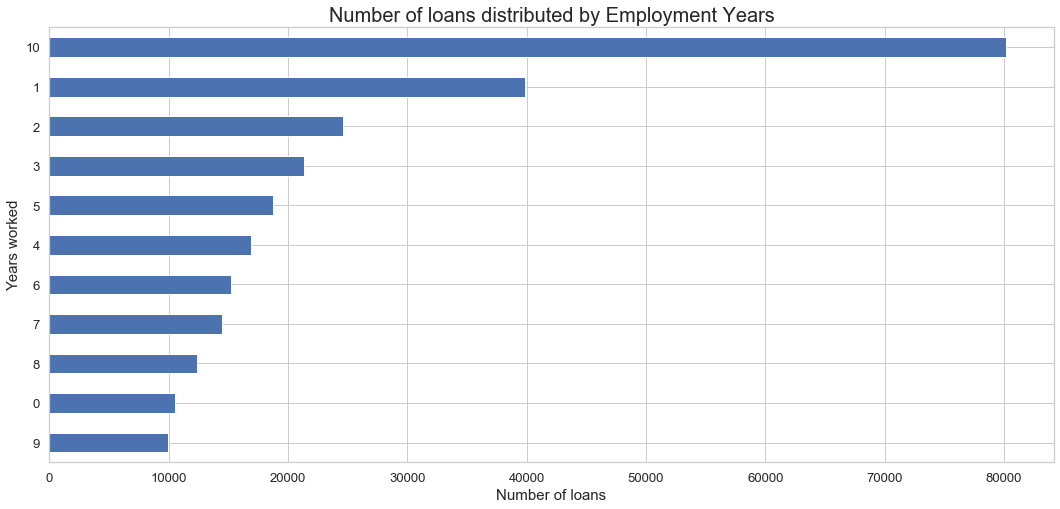

In [490]:
filtered_current_dropped_missing_value_df ['emp_length'].fillna(value=0,inplace=True)
filtered_current_dropped_missing_value_df ['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
filtered_current_dropped_missing_value_df ['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

#### Explore the relationship of (good/bad) loan with emp_length

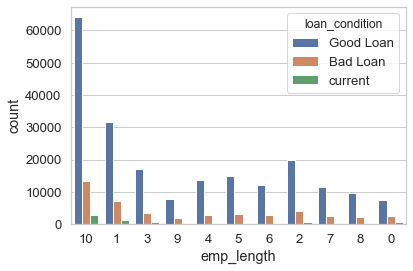

In [491]:
ax = sns.countplot(x="emp_length", hue="loan_condition", data=filtered_current_dropped_missing_value_df )


### Define metrics when evaluating loan profit


### Create new metric

In [492]:

def create_annualized_metrics( df):
    
    """Create annualized metrics columns to evaluate the performance of each loan based on 
       existing performance metrics.
    
    """
    
    
    df['term_num'] = df['term'].str.slice(0,3).apply(pd.to_numeric)
    df['annual_profit_rate']= (df['total_pymnt_inv']/df['funded_amnt_inv'])**(1/df['term_num']/12)
    df['annual_profit_size'] = (df['total_pymnt_inv']-df['funded_amnt_inv'])/(df['term_num']/12)
    
    return df

def create_emp_length_df_groups( df, emp_length_range = 10):
    
    
    """ classify loans by emplyment_length in order to check whether emplyment length will
        have an impact on loan performance
    
    
    Args:
    df: pre_processed dataframe
    emp_length: the range of employment length from loans 
    
    Returns:
    emp_length_df_groups: 
    """
    
    # use list comprehension to avoid writing for-loops 
    emp_length_groups = [ get_emp_metric2( df, emp_length_i ) for emp_length_i in range(1,emp_length_range)]
    
    
    #create df to make emp_length group into proper fromat
    emp_length_groups_df = pd.DataFrame(emp_length_groups, columns=['emp_length','good_loan','bad_loan','avg_int_rate'])  
    #loss rate but not yet specified on 36 or 60 months
    #test['loss_rate%']=(test['good_loan'])/(test['bad_loan']+test['good_loan'])

    emp_length_groups_df['loss_rate%']=(emp_length_groups_df['bad_loan'])/(emp_length_groups_df['bad_loan']+emp_length_groups_df['good_loan'])
    emp_length_groups_df['good_rate%']=(emp_length_groups_df['good_loan'])/(emp_length_groups_df['bad_loan']+emp_length_groups_df['good_loan'])

    emp_length_groups_df.sort_values('loss_rate%',ascending = True)
    
    return emp_length_df_groups



def get_emp_metric2(df, emp_length_i):
    
    """A helper function used in create_emp_length_df_groups to calculate the detail statistics of loan performance 
    for each loan_category 
    
    
    Args:
    df: pre_processed dataframe
    emp_length_i: the employment length of applicant from the loan 
    
    Returns:
    content: the detail statistics of loan performance of each employment length group
    
    
    """
    
    
    emp_df = df[(df["emp_length"]==str(emp_length_i))]
    bad = len(df[(df["emp_length"]==str(emp_length_i))&(df["loan_condition"]=="Bad Loan")]) 
    good = len(df[(df["emp_length"]==str(emp_length_i))&(df["loan_condition"]=="Good Loan")])   
    #annual_profit_rate
    
    avg_int_rate = calculate_avg_profit_rate(emp_df)

        
    content = [emp_length_i,bad,good,avg_int_rate]
    print(content)
    
    return content



def calculate_avg_profit_rate(df):
    
    """A helper function to calculate the avrage_profit_rate for loans"""
    
    ann_rate = df['annual_profit_rate']
    ann_rate_list = []
    for int_rate in ann_rate:
        if math.isnan(int_rate):
            pass
        else:
            ann_rate_list.append(float(int_rate))
    avg_int_rate = sum(ann_rate_list)/len(ann_rate_list)
    
    return avg_int_rate

    
    

In [495]:

added_new_metric_df = create_annualized_metrics( filtered_current_dropped_missing_value_df)

emp_length_df_groups = create_emp_length_df_groups ( added_new_metric_df, emp_length_range = 11)
emp_length_df_groups



/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be s

[1, 7018, 31544, 0.96531227342368]
[2, 4116, 19794, 0.9706766411602914]
[3, 3606, 17040, 0.9670358105342409]
[4, 2831, 13571, 0.9703267656298435]
[5, 3253, 14978, 0.9720808657831477]
[6, 2738, 12159, 0.9779102093033045]
[7, 2634, 11551, 0.9808313051910923]
[8, 2186, 9770, 0.9645311377412218]
[9, 1798, 7851, 0.9696728517754016]
[10, 13289, 64062, 0.9640441345332476]


,emp_length,good_loan,bad_loan,avg_int_rate,loss_rate%,good_rate%
0,1,7018,31544,0.965312,0.818007,0.181993
1,2,4116,19794,0.970677,0.827854,0.172146
2,3,3606,17040,0.967036,0.825341,0.174659
3,4,2831,13571,0.970327,0.827399,0.172601
4,5,3253,14978,0.972081,0.821568,0.178432
5,6,2738,12159,0.977910,0.816205,0.183795
6,7,2634,11551,0.980831,0.814311,0.185689
7,8,2186,9770,0.964531,0.817163,0.182837
8,9,1798,7851,0.969673,0.813659,0.186341
9,10,13289,64062,0.964044,0.828199,0.171801


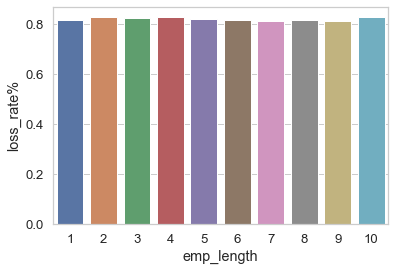

In [496]:
ax = sns.barplot(x="emp_length", y="loss_rate%", data= emp_length_df_groups)


#### Explore Loan Purpose 
 - Decide if loan purpose is a good variable to further classify it by group.
 - Explore the relationship of loss rate, profit rate to loan purpose.


In [497]:


purpose_list = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']

def get_purpose_metric(df, purpose):

    purpose_df = df[(df["purpose"]==purpose)]
    bad = len(df[(df["purpose"]==purpose)&(df["loan_condition"]=="Bad Loan")]) 
    good = len(df[(df["purpose"]== purpose)&(df["loan_condition"]=="Good Loan")])
       
    avg_int_rate = calculate_avg_profit_rate(purpose_df)

    #annual_profit_size
    annual_avg_profit_size = purpose_df['annual_profit_size'].mean()
    #append everything
    content = [purpose,bad,good,avg_int_rate,annual_avg_profit_size]        
    return content


def create_purpose_df_groups( df, purpose_group_list = purpose_list):
    
    # use list comprehension to avoid writing for-loops 
    purpose_groups = [ get_purpose_metric( df, purpose ) for purpose in purpose_group_list]
    
    # create dataframe 
    purpose_group_df = pd.DataFrame( purpose_groups,columns=['loan_purpose','bad_loan','good_loan','annual_avg_profit_rate','annual_avg_profit_size'])  
    purpose_group_df['loss_rate_not_annulalized']=(purpose_group_df['bad_loan'])/(purpose_group_df['bad_loan']+purpose_group_df['good_loan'])
    purpose_group_df.sort_values('loss_rate_not_annulalized', ascending = False, inplace = True)
    
    return purpose_group_df

In [498]:


purpose_group = create_purpose_df_groups (added_new_metric_df, purpose_list)
purpose_group

,loan_purpose,bad_loan,good_loan,annual_avg_profit_rate,annual_avg_profit_size,loss_rate_not_annulalized
2,small_business,1443,3464,0.975568,-244.003389,0.294070
9,moving,440,1634,0.972404,-103.843033,0.212150
13,educational,88,334,0.992504,51.839345,0.208531
3,other,3057,11644,0.966302,-94.052740,0.207945
12,renewable_energy,55,215,0.978024,-68.975799,0.203704
8,medical,591,2321,0.966774,-91.567958,0.202953
5,debt_consolidation,27891,121572,0.968078,-88.988093,0.186608
11,house,297,1399,0.978470,5.872161,0.175118
10,vacation,276,1331,0.964942,-65.922686,0.171749
0,credit_card,7895,42521,0.959922,-74.881457,0.156597


###  loss rate annualized X purpose 

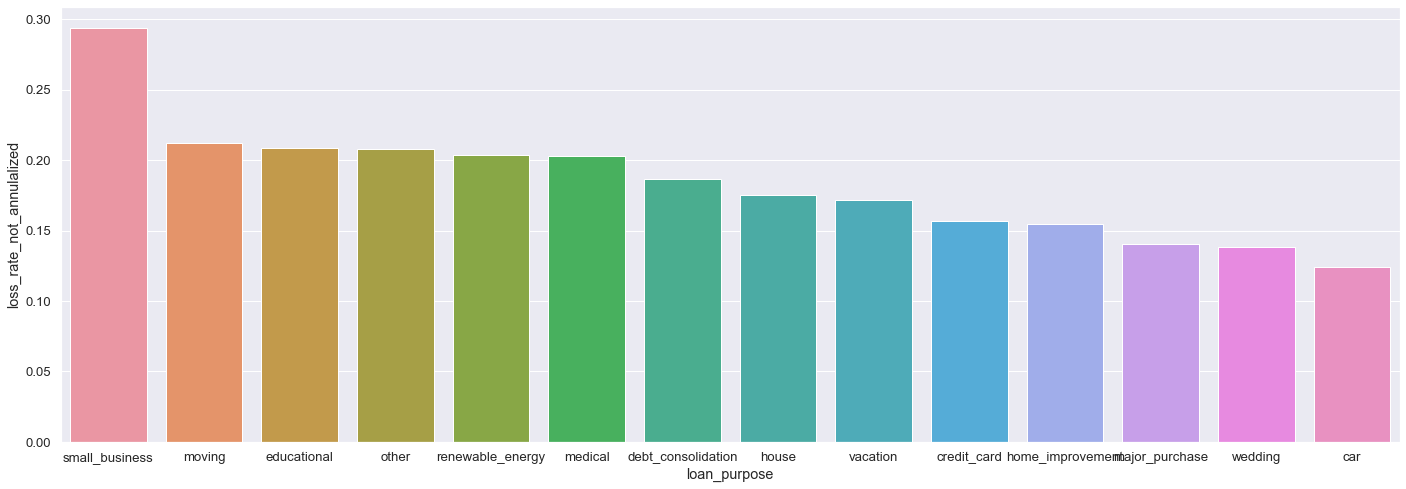

In [499]:
from matplotlib import pyplot as plt
sns.set(font_scale=1.2)
plt.figure(figsize=(24,8))
ax = sns.barplot(x="loan_purpose", y="loss_rate_not_annulalized", data= purpose_group)

### loss rate annualized X purpose scatter plot

In [500]:
purpose_group

,loan_purpose,bad_loan,good_loan,annual_avg_profit_rate,annual_avg_profit_size,loss_rate_not_annulalized
2,small_business,1443,3464,0.975568,-244.003389,0.294070
9,moving,440,1634,0.972404,-103.843033,0.212150
13,educational,88,334,0.992504,51.839345,0.208531
3,other,3057,11644,0.966302,-94.052740,0.207945
12,renewable_energy,55,215,0.978024,-68.975799,0.203704
8,medical,591,2321,0.966774,-91.567958,0.202953
5,debt_consolidation,27891,121572,0.968078,-88.988093,0.186608
11,house,297,1399,0.978470,5.872161,0.175118
10,vacation,276,1331,0.964942,-65.922686,0.171749
0,credit_card,7895,42521,0.959922,-74.881457,0.156597


Text(62.97027962500002, 0.5, 'Profit Size')

<Figure size 720x1080 with 0 Axes>

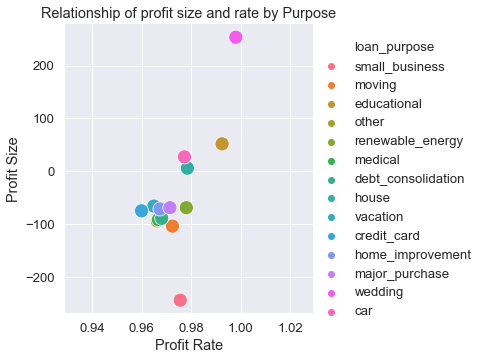

In [501]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,15))
sns.relplot(x="annual_avg_profit_rate", y="annual_avg_profit_size",
                      hue="loan_purpose", s=200, data= purpose_group) # S marker size)

# Set title
plt.title('Relationship of profit size and rate by Purpose')

# Set x-axis label
plt.xlabel('Profit Rate')

# Set y-axis label
plt.ylabel('Profit Size')

Text(61.199404625000014, 0.5, 'Bad Loan %')

<Figure size 360x576 with 0 Axes>

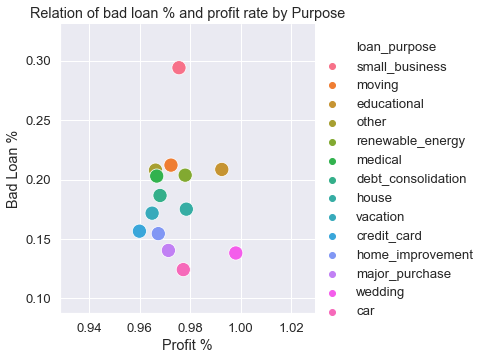

In [502]:
sns.set(font_scale=1.2)
plt.figure(figsize=(5,8))
sns.relplot(x="annual_avg_profit_rate", y="loss_rate_not_annulalized",
                      hue="loan_purpose",data = purpose_group,s = 200) # S marker size)

# Set title
plt.title('Relation of bad loan % and profit rate by Purpose')

# Set x-axis label
plt.xlabel('Profit %')

# Set y-axis label
plt.ylabel('Bad Loan %')

#### Time Series analysis on loan by purpose

In [503]:

year_list = [2007,2008,2009,2010,2011,2012,2013,2014,2015]
purpose_list = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house',
       'educational']



def create_year_purpose_df_groups( df, years = year_list, purposes = purpose_list):
    
    """ classify loans by purpose in order to check whether loan purpose will
        have an impact on loan performance
    
    
    Args:
    df: pre_processed dataframe
    years: the years we are considering to check for loans
    purpose: the loan purposes we are consideirng to examine 
    
    Returns:
    purpose_year_groups_df: the df that is detailed break down of loan performance by year/purpose 
    """
    
    
    # use list comprehension to avoid writing NESTED for-loops 
    purpose_year_groups = [  get_annualized_metric(df, year, purpose)  for year in years for purpose in purposes]
    
    # create dataframe 
    
    purpose_year_groups_df = pd.DataFrame( purpose_year_groups,columns=['year','purpose','annual_int_rate','good_annual_int_rate','average_profit_size'
                                  ,'loss_rate_not_annualized'])

    purpose_year_groups_df.sort_values('year', ascending = True, inplace = True)

    return purpose_year_groups_df
    

def get_annualized_metric(df, year, purpose):
    
    """ A helper function for create_year_purpose_df_groups, create annualzed metrics and check the number of good/bad
        loan in each group
    
    
    Args:
    df: pre_processed dataframe
    years: the years we are considering to check for loans
    purpose: the loan purposes we are consideirng to examine 
    
    Returns:
    purpose_year_groups_df: the df that is detailed break down of loan performance by year/purpose 
    """
    
    
        # get df by year and grade and 36 months term 
        info = df[(df["year"]== year)&(df["purpose"]== purpose)]

        # ann_rate_list 
        average_annual_profit_rate = info['annual_profit_rate'].mean()
        # good loan annual interest rate avg
        good_df = info[(info["loan_condition"]=="Good Loan")]
        average_good_annual_rate = good_df['annual_profit_rate'].mean()

        #loss rate avg per year 

        bad = len(info[(info["loan_condition"]=="Bad Loan")])
        good = len(info[(info["loan_condition"]=="Good Loan")])
        if bad ==0:
            print(each_purpose + ' '+ str(each_year)+' '+ ' bad_loan number is 0')
            bad=1
        if good ==0:
            print(each_purpose + ' '+ str(each_year)+' '+ ' good_loan number is 0')
            good=1
        loss_rate_not_annulalized = bad/(bad+good)

        #mean_profit_rate
        annual_avg_profit_size = info['annual_profit_size'].mean()

        content = [year,purpose,average_annual_profit_rate, average_good_annual_rate,
                   annual_avg_profit_size,loss_rate_not_annulalized]

        return content 
    
    


    
    


In [504]:
year_purpose_group = create_year_purpose_df_groups (added_new_metric_df, year_list, purpose_list)
year_purpose_group

educational 2007  bad_loan number is 0
educational 2007  bad_loan number is 0
educational 2007  good_loan number is 0
educational 2007  bad_loan number is 0
educational 2007  good_loan number is 0
educational 2007  bad_loan number is 0
educational 2007  good_loan number is 0
educational 2007  bad_loan number is 0
educational 2007  bad_loan number is 0
educational 2007  good_loan number is 0
educational 2007  bad_loan number is 0
educational 2007  bad_loan number is 0
educational 2007  good_loan number is 0


,year,purpose,annual_int_rate,good_annual_int_rate,average_profit_size,loss_rate_not_annualized
0,2007,credit_card,1.000158,1.000341,19.531096,0.137931
12,2007,educational,0.999985,1.000359,60.165605,0.166667
11,2007,house,0.999895,1.000316,-30.539153,0.250000
10,2007,vacation,0.999817,1.000214,9.298333,0.250000
8,2007,medical,0.999887,1.000348,-1.637407,0.222222
...,...,...,...,...,...,...
105,2015,car,0.752750,1.000042,-806.633280,0.090196
104,2015,credit_card,0.684795,0.999307,-1575.881087,0.098520
115,2015,house,0.845556,1.000032,-779.359894,0.093596
109,2015,debt_consolidation,0.768082,0.999787,-1198.825357,0.109654


###  loss rate annualized X small business by year statistics

In [505]:
print("    small_business_by_year   ")
year_purpose_group.head()

    small_business_by_year   


,year,purpose,annual_int_rate,good_annual_int_rate,average_profit_size,loss_rate_not_annualized
0,2007,credit_card,1.000158,1.000341,19.531096,0.137931
12,2007,educational,0.999985,1.000359,60.165605,0.166667
11,2007,house,0.999895,1.000316,-30.539153,0.250000
10,2007,vacation,0.999817,1.000214,9.298333,0.250000
8,2007,medical,0.999887,1.000348,-1.637407,0.222222


###  loss rate annualized X small business by year plot


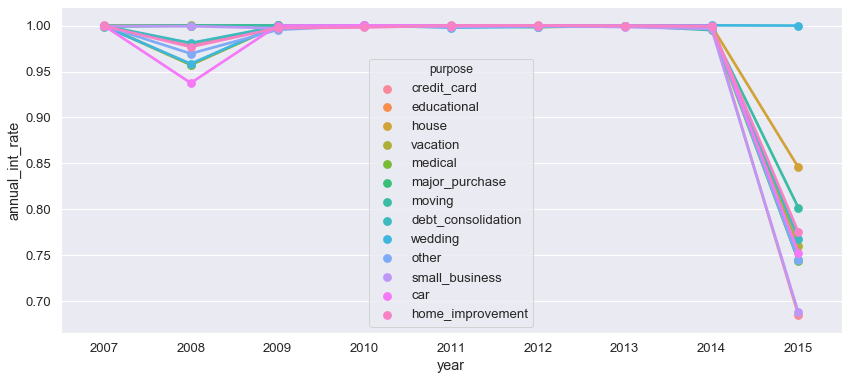

In [506]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='year', y='annual_int_rate', 
                  data= year_purpose_group, hue= 'purpose')


### Findings and what we learn from Exploratory Data Analysis
_1)_ col(emp_length) has no significant impact on loss rate. 
> -  When we bucket emp_length by years, there is no obvious pattern for us to conclude the longer your employment history is, the lower the risk you default. 

_2)_ col(loan_purpose) can be used to further classify loans. 
> -  When classifying loans by purpose, we observe that certain groups have higher or lower loss rate.  

_3)_ Use extra metrics to evaluate loan profitability.
> -  When evaluating loan's profitability, we should look at "annualized" loss rate, profit size and profit rate.


_4)_ Annual loss rate by purpose varies year by year 
> -  We surprisingly find out that loss rate varies by year. From 2007 to 2014, the variation of loss rate is minor. However, the loss rate **drops dramatically at 2015**. 



### Business Question: 
####  Q-1: What rate of return have 36m loans generated on average?   
####  Q-2: When bucketed by year of origination and grade, which cohort had the highest rate of return?   

_1)_ Define rate of return: 
> -  The definition of rate of return varies. Annualized rate of return fits better here:

> $$
\begin{array}{rrcl}
  & AnnualProfitRate
  & & \equiv & \frac{TotalPayment}{InitialFund}^ \frac{1}{Years} - 1
\end{array}
$$

_2)_ Create two extra metrics to evaluate loan profitability. 
> -  Rate of return is indeed an important metric but we should also consider **the size of the profit** and the loan's **default rate**, which will enable us to have a comprehensive understanding of loan profitability. 

>\begin{array}{rrcl}
  & AnnualProfitSize
  & & \equiv &  \frac{TotalPayment- InitialFund}{Years}
\end{array}

>$$
\begin{array}{rrcl}
  & AnnualLossRate
  & &      \equiv &  1 - {(1 - LossRateNotAnnual)}^ \frac{1}{Years}
\end{array}
$$

_3)_ Create another metric to specifically focus on good loan profitability. 
> -  We want to know  the profitability of (good+bad loan) but we also want to understand the difference between two groups. 

_4)_ Classify loans by purpose and evaluate their return rate. 
> -  We learned from Q1 that loan purpose is a good variable to classify loans since the default rate varies by purpose.






#### Data Prepocssing 
- Get month duration for each loan. 
- Get duration of the loan.

In [507]:
def data_prepocessing(df):
    
    """ prepocessed df for the need of answering Q1/Q2, including hanlde of time_duration metrics, format of time metric"""
    
    df['issue_d_format'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
    df['last_pymnt_d_format'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')
    df['Months'] = ((df.last_pymnt_d_format.dt.year - df.issue_d_format.dt.year) * 12 +
                    (df.last_pymnt_d_format.dt.month -  df.issue_d_format.dt.month))
    df['Months'].replace([np.inf, -np.inf], np.nan)
    df.dropna(subset=['Months'],how='any')

    df['duration']= df['total_pymnt_inv']/df['installment']
    df['duration'] = df['duration'].astype(int)
    
    return df 

In [508]:
#df = load_data()



In [509]:
df_pre_processed = data_prepocessing(filtered_current_dropped_missing_value_df)

df_pre_processed.head()

/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be s

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rev_hi_lim,year,loan_condition,term_num,annual_profit_rate,annual_profit_size,issue_d_format,last_pymnt_d_format,Months,duration
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,2011,Good Loan,36,1.000368,285.593333,2011-12-01,2015-01-01,37.0,35
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,2011,Bad Loan,60,0.998740,-298.258000,2011-12-01,2013-04-01,16.0,16
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,2011,Good Loan,36,1.000519,201.216667,2011-12-01,2014-06-01,30.0,35
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,2011,Good Loan,36,1.000465,742.100000,2011-12-01,2015-01-01,37.0,36
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,2011,Good Loan,36,1.000275,210.460000,2011-12-01,2015-01-01,37.0,35


#### Q-1 : What rate of return have these loans generated on average?


In [512]:
year = 3 
purpose_list = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']



          
        
def get_annualized_metric_q1_t(df, year, purpose):
    
    """ A helper function for create_purpose_df_groups_q1_t, 
        get specific annulized meterics and create detail metrics to monitor loan performance
    
    Args:
    df: pre_processed dataframe
    years: the years we are considering to check for loans
    purpose: the loan purposes we are consideirng to examine 
    
    Returns:
    purpose_year_groups_df: the df that is detailed break down of loan performance by purpose 
    
    """
    
    
        purpose_df = df[(df["purpose"]==purpose)&(df["term"]==' 36 months')]     
        purpose_df['annual_int'] = (purpose_df['total_pymnt_inv']/purpose_df['funded_amnt_inv'])**(1/year)        
        good_df = purpose_df[(purpose_df["loan_condition"]=="Good Loan")]
        
        all_avg_int_rate = calculate_avg_int_rate(purpose_df)
        good_avg_int_rate = calculate_avg_int_rate(good_df)        
        
        #profit_size
        profit_size = purpose_df['annual_profit_size']
        annual_mean_profit_size = profit_size.mean() 

        #loss rate avg per year 
        bad = len(df[(df["purpose"]== purpose)&(df["loan_condition"]=="Bad Loan")])
        good = len(df[(df["purpose"]== purpose)&(df["loan_condition"]=="Good Loan")])
        if (good+bad) ==0:
            loss_3_year = 0
        else:
            loss_3_year = (bad/(good+bad))
        annual_loss = 1-((1-loss_3_year)**(1/year))
        content = [purpose,bad,good,all_avg_int_rate,annual_mean_profit_size,annual_loss,good_avg_int_rate]

        return content 
    
def create_purpose_df_groups_q1_t(df,  purposes , year):
    
    
    """ create dataframe and classify loan by purpose and check its performance
    
    
    Args:
    df: pre_processed dataframe
    year: what type of loans we are considering (3 years loan)
    purpose: the loan purposes we are consideirng to examine 
    
    Returns:
    purpose_year_groups_df: the df that is detailed break down of loan performance by year/purpose """
    
    
    
    # use list comprehension to avoid writing NESTED for-loops 
    purpose_groups = [  get_annualized_metric_q1_t(df, year, purpose)  for purpose in purposes ]
    
    # create dataframe 
    

    purpose_groups_df = pd.DataFrame(purpose_groups,columns=['loan_purpose','bad_loan','good_loan','avg_annual_int_rate','annual_avg_profit_size'
                                 ,'loss_rate_per_year','good_avg_annual_int_rate'])  
    purpose_groups_df.sort_values('good_avg_annual_int_rate', ascending = False)
    return purpose_groups_df



def calculate_avg_int_rate(df):
    
    ann_rate = df['annual_int']
    ann_rate_list = []
    for int_rate in ann_rate:
        if math.isnan(int_rate):
            pass
        else:
            ann_rate_list.append(float(int_rate))
    avg_int_rate = sum(ann_rate_list)/len(ann_rate_list)
    
    return avg_int_rate

In [513]:
test2 = create_purpose_df_groups_q1_t( df_pre_processed, purpose_list, 3)

test2

/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,loan_purpose,bad_loan,good_loan,avg_annual_int_rate,annual_avg_profit_size,loss_rate_per_year,good_avg_annual_int_rate
0,credit_card,7895,42521,0.967182,0.882420,0.055189,1.039369
1,car,461,3249,0.983592,33.649396,0.043264,1.036631
2,small_business,1443,3464,0.951882,-151.836662,0.109596,1.048703
3,other,3057,11644,0.956230,-41.055206,0.074766,1.042760
4,wedding,278,1733,1.014753,263.291030,0.048383,1.050950
5,debt_consolidation,27891,121572,0.968239,1.997007,0.066531,1.040176
6,home_improvement,2340,12803,0.967673,-17.772045,0.054416,1.036598
7,major_purchase,897,5491,0.976645,-16.497106,0.049186,1.037662
8,medical,591,2321,0.952331,-54.444849,0.072826,1.041597
9,moving,440,1634,0.955251,-69.873490,0.076406,1.042754


####  Q-2: When bucketed by year of origination and grade, which cohort had the highest rate of return?   


In [514]:
years_list = [2007,2008,2009,2010,2011,2012,2013,2014,2015]
# 36 months loan
loan_year =3
data = []
grades_list = ['A','B','C','D','E','F','G']


def create_year_grade_df_groups(df, years , grades , loan_year):
    
    """ create dataframe and classify loan by grade/year and check its performance"""
    
    # use list comprehension to avoid writing NESTED for-loops 
    grade_year_groups = [  get_annualized_metric_q2(df, grade, year, loan_year)  for year in years_list for grade in grades_list]
    
    # create dataframe 
    grade_year_groups_df = pd.DataFrame(grade_year_groups,columns=['year','grade','annual_int_rate','good_annual_int_rate','average_profit_size','loss_rate_per_year','good_loan_num','bad_loan_num'])  

    grade_year_groups_df.sort_values('annual_int_rate', ascending = False, inplace = True)

    return grade_year_groups_df


def get_annualized_metric_q2( df, each_grade, each_year, loan_year):
    
        
    
    """ A helper function for create_year_grade_df_groups, 
        get specific annulized meterics and create detail metrics to monitor loan performance
    
    Args:
    df: pre_processed dataframe
    each_grade: the grade level of each loan
    year: the specific loan we are considering
    
    Returns:
    purpose_year_groups_df: the df that is detailed break down of loan performance by grade/year 
    
    """

    # get df by year and grade and 36 months term 
    info = df[(df["year"]==each_year)&(df["grade"]==each_grade)&(df["term_num"]==36)]
    # ann_rate_list 
    info['annual_int'] = (info['total_pymnt_inv']/info['funded_amnt_inv'])**(1/loan_year)
    
    
    all_avg_int_rate = calculate_avg_int_rate( info)

    # good loan annual interest rate avg
    good_df = info[(info["loan_condition"]=="Good Loan")]
    
    good_avg_int_rate = calculate_avg_int_rate( good_df)

    #loss rate avg per year 
    bad = len(info[(info["loan_condition"]=="Bad Loan")])
    good = len(info[(info["loan_condition"]=="Good Loan")])
    loss_3_year = (bad/(good+bad))
    annual_loss = 1-((1-loss_3_year)**(1/year))

    #mean_profit_rate
    profit_size = info['annual_profit_size']
    annual_profit_size = profit_size.mean()

    content = [each_year,each_grade,all_avg_int_rate,good_avg_int_rate,annual_profit_size,annual_loss,good,bad]

    return content



    
    

In [515]:
loan_year=3
create_year_grade_df_groups(df_pre_processed, years_list, grades_list, loan_year)





/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,year,grade,annual_int_rate,good_annual_int_rate,average_profit_size,loss_rate_per_year,good_loan_num,bad_loan_num
41,2012,G,1.042903,1.101551,1888.399306,0.058964,20,4
40,2012,F,1.032257,1.094894,1104.814110,0.065712,84,19
39,2012,E,1.031268,1.089113,1034.109503,0.078697,617,172
0,2007,A,1.026496,1.031123,48.934659,0.017395,74,4
32,2011,E,1.024059,1.080135,729.952095,0.073963,216,56
...,...,...,...,...,...,...,...,...
58,2015,C,0.749876,1.011844,-1060.480637,0.032315,5272,546
62,2015,G,0.727026,1.024126,-923.867957,0.058964,20,4
56,2015,A,0.692934,1.004878,-1465.629911,0.009188,3134,88
57,2015,B,0.687563,1.008361,-1284.976970,0.020329,4689,298


### Findings and what we learn from business questions
_1)_ Loans for Weddings have the highest annual return rate.  
> -  Weddings outperforms all other purposes in almost every metric. It is the safest group to invest. 

_2)_ Upon looking at small business loans, we see there is a huge gap between (bad+good) vs (good) loan loss rate. 
> -  This may imply that "small business" is the type of loan that is high return and high risk. Being able to detect default loan is fairly important here. It will be interesting to further analyze this group. 


_3)_ (Year 2012,G) has the highest annual return, followed by (Year 2012,F).
> -  Although cohort (2012,G) is the top1, the size is relatively small. Cohort (2012,F) will be a better group to consider. 




### Model/Deploy - Build Model to increase return rate 

_1)_ Based on the question being asked, we can set our goal as ** maximizing the return rate**. 

_2)_ Further break down ** maximizing the return rate**:  

> - **Being able to predict whether the loan will default**. (Choose to work on this)
- Being able to predict the return rate for the non-default loan. 


_3)_ Use Random Forest to build the model:
- Use one-hot encoding for non-ordinal categorical variables.
- Use label encoding for ordinal categorical variables. 

_4)_ Conduct Time Series analysis on return rate.  


In [517]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier



def data_preprocessed(df):
    """ preprossed data for model prediction use, including select columns and specific loan group to use
    """

    df = df[(df["purpose"]=='small_business')&(df_pre_processed["term_num"]==36)]
    df = df[['funded_amnt_inv','int_rate','grade','annual_inc','verification_status','emp_length','loan_condition','home_ownership','year']]
    df = df.dropna()

    return df

    
    
def feature_engineering_dummy(df):
    
    """ apply certain rules on selected columns to create features for later use in model prediction
    """
    
    # assign dummy variable to selected columns
    df['loan_condition_dummy'] = df['loan_condition'].apply(loan_condition)
    df['grade_dummy'] = df['grade'].apply(grade)
    df['status_dummy'] = df['verification_status'].apply(verification_status)
    df['emp_length'] = df['emp_length'].astype(int)
    df = df.dropna()
    df['loan_condition_dummy'] = df['loan_condition_dummy'].astype(int)
        
    return df
    

def feature_engineering_one_hot(df,column_name):
    """ apply one-hot encoding on selected columns
    """
    
    df = encode_onehot(df, cols=[column_name])
    
    return df     
    

def encode_onehot(df, cols):
    vec = DictVectorizer() 
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict('records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    
    return df


    
def loan_condition(status):
    if status == 'Good Loan':
        return int(1)
    elif status == 'Bad Loan':
        return int(0)

def grade(status):
    if status == 'A':
        return int(7)
    elif status == 'B':
        return int(6)
    elif status == 'C':
        return int(5)
    elif status == 'D':
        return int(4)
    elif status == 'E':
        return int(3)
    elif status == 'F':
        return int(2)
    else:
        return int(1)
    
    
def verification_status(status):
    if status == 'Verified':
        return int(2)
    elif status == 'Not Verified':
        return int(0)
    else :
        return int(1)
    
    
    


###  Modeling 

#### data prepocessing - categorical variables  
- Label encoding
- One-hot encoding 

#### target "small business" group for prediction

In [523]:

df_pre_processed_ml = data_preprocessed(df_pre_processed)

df_pre_processed_ml = feature_engineering_dummy(df_pre_processed_ml)

df_pre_processed_ml = feature_engineering_one_hot(df_pre_processed_ml,'home_ownership')


X = df_pre_processed_ml[['funded_amnt_inv','int_rate','annual_inc',
                'emp_length','grade_dummy', 'status_dummy',
       'home_ownership=MORTGAGE', 'home_ownership=OTHER', 'home_ownership=OWN',
       'home_ownership=RENT']]
Y = df_pre_processed_ml[['loan_condition_dummy']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)





/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


#### Judged by the plot, split the data by year to see if prediction result could be improved  
> 2015, 2007 - 2014, all years 

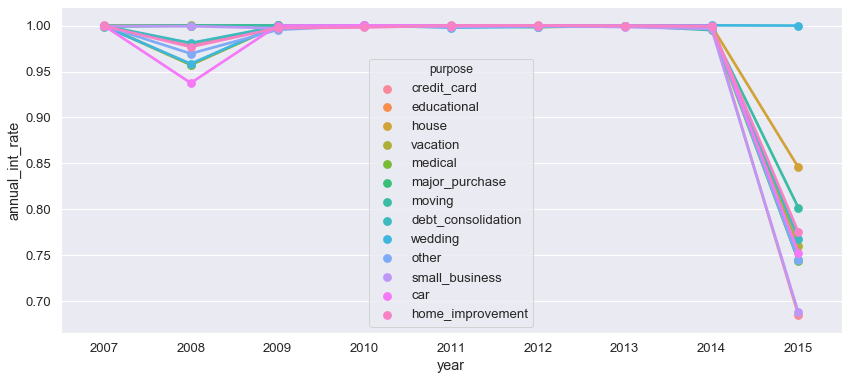

In [526]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='year', y='annual_int_rate', 
                  data= year_purpose_group, hue= 'purpose')

#### Compare the accuracy of different groups.  
> 2015, 2007 - 2014, all years 

In [527]:
saver = []
df_pre_processed_ml_except_2015 = df_pre_processed_ml[df_pre_processed_ml['year']!=2015]
df_pre_processed_ml_year_2015 = df_pre_processed_ml[df_pre_processed_ml['year']==2015]
saver.append(df_pre_processed_ml)
saver.append(df_pre_processed_ml_except_2015)
saver.append(df_pre_processed_ml_year_2015)

In [528]:
from sklearn.ensemble import RandomForestClassifier

summary = []


for df in saver:
    
    good = len(df[(df["loan_condition_dummy"]==1)])
    bad = len(df[(df["loan_condition_dummy"]==0)])
    
    X = df[['funded_amnt_inv','int_rate','annual_inc',
                'emp_length','grade_dummy', 'status_dummy',
       'home_ownership=MORTGAGE', 'home_ownership=OTHER', 'home_ownership=OWN',
       'home_ownership=RENT']]
    Y = df[['loan_condition_dummy']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    
    clf = RandomForestClassifier(n_estimators=20)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy_model = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_model)
    
    
    summary.append([good, bad, accuracy_model])


Accuracy: 0.6965394853593612
Accuracy: 0.6978484565014031
Accuracy: 0.7758620689655172


/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/laalberta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


#### Compare the accuracy of different groups.  
> 2015, 2007 - 2014, all years 

In [529]:

summary = pd.DataFrame(summary,columns=[ 'good loan','bad loan','accuracy'])  

year = pd.DataFrame(['all_years','2015','2007-2014'],columns=[ 'year'])  
summary = summary.join(year)

summary

,good loan,bad loan,accuracy,year
0,2806,949,0.696539,all_years
1,2648,915,0.697848,2015
2,158,34,0.775862,2007-2014


### Findings and what we learn from Model/Deploy
_1)_ Accuracy rate around 70% is our benchmark for predicting default loan on small business. 

_2)_ Further splitting the data by year is necessary for modelling. 
> - Based on the plot at Exploratory Data part, we know that return rate drops dramatically at Year 2015. By splitting our data into Year 2015 and 2007-2014, the accuracy rate increases dramatically for 2015. 


_3)_ Reasons to choose Random Forest and its pro and cons. 
> -  Random Forest is **straightforward to explain to client** compared to other ML models like SVM, Neural Network. 
> -  It can deal with both categorical and continuous variables.
> -  It is one of the most accurate learning algorithms available, thanks to its multiple trees designs. 
> -  One-hot encoding technique can really blow up quickly and we will start fighting with the curse of dimensionality.
> -  Over-fitting can easily occur. 
> -  Need to find the ideal number of trees. 

_3)_ Next steps
> - Further examine other purpose and see whether **splitting by year affects accuracy on other groups** as well. 
> - Add more variables when building model. (Due to high number of missing values, lots of variables are dropped here)
> - Build the model to **predict return rate for fully-paid loans** will be our next step in order to **"maximizing the return rate"**. 
> - **Competitor analysis**. See if user have and what options to choose from other platforms. 
> - **Personal endurance** testing on deciding the range of interest rate users can accpet. 



## END 